This notebook creates the kinds of visualizations that are shown in various instances throughout the paper. Its colors and input data are easily customized, via the variables below. 

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from viz_utils import *

# Choose a simulation and analyze it

`file_name` refers to one of the `.zip` files containing Monte Carlo draws.

`participation` refers to the parameter `p` from the paper, the proportion of the population who test at all. (This is different from compliance, the fraction of intended tests that were actually taken.)

`max_samples` controls the smoothness of the curves (by averaging over more samples), but may also cause the computation to take a few minutes.

`t_max` is the number of days (since exposure) over which the curves should be computed.

In [2]:
file_name = '05ec491168c8c1750e3dca76abc589b82cb48a7b0941a9e5b1c73b26b1755a5c.zip'
participation = 1
beta_0,beta_testing,CCDF_tDx,x,TE,asc = compute_curves(file_name,
                                                       participation,
                                                       t_max=25,
                                                      max_samples=2500)

# Plot

Ascertainment: 0.323
TE: 0.267


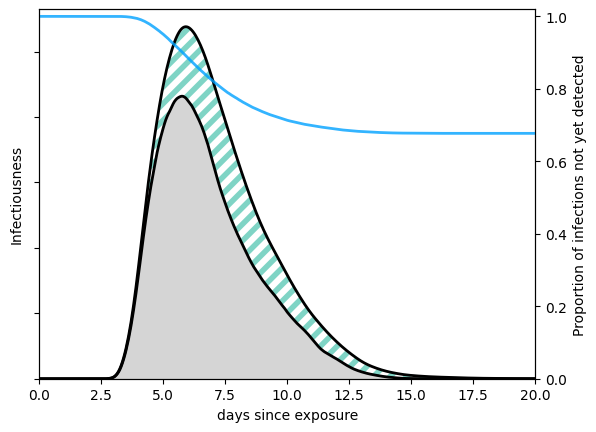

In [ ]:
plt.rcParams['hatch.linewidth'] = 4  # hatch linewidth
# THEME_COLOR = np.array([0,171,142])/255
THEME_COLOR = np.array([127,212,197])/255

MY_BLUE = np.array([0,161,255])/255

fig,ax = plt.subplots()
b0 = smooth(beta_0,10)
bt = smooth(beta_testing,10)
ax.plot(x,b0,
        color='k',lw=2)
ax.plot(x,bt,
        color='k',lw=2)
ax.fill_between(x,b0,
                color="white",
                edgecolor=THEME_COLOR,
                hatch="//")
ax.fill_between(x,bt,
                color=np.array([213,213,213])/255)

ax.set_ylabel('Infectiousness')
ax.set_ylim(bottom=0)
ax.set_yticklabels([])
ax.set_xlim([0,20])
ax.set_xlabel('days since exposure')

ax2 = ax.twinx()
ax2.set_xlim([0,20])
ax2.plot(x,CCDF_tDx,color=MY_BLUE,alpha=0.8,lw=2)
ax2.set_ylim([0,1.02])
ax2.set_ylabel('Proportion of infections not yet detected')

print('Ascertainment: {:.3f}'.format(asc))
print('TE: {:.3f}'.format(TE))